# PDS09 Project 02 #
* Dataset Marging
* Data Manipulation
* K-Means Clustering

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df1 = pd.read_csv('term-test-1-result.csv')
df2 = pd.read_csv('term-test-2-result.csv')

df = pd.merge(df1, df2, on=['Registration Number', 'Name'])
df.head()

,Registration Number,Name,TT-1 Marks,TT-2 Marks
0,2020338001,Andrew Myers,9,19
1,2020338002,Anna Robinson DDS,20,10
2,2020338003,Scott Jones,14,11
3,2020338004,Scott Owen,15,19
4,2020338005,Michael Hawkins,13,8


In [31]:
df['Best One'] = df[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)
df['Average'] = df[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1)

df.head()

,Registration Number,Name,TT-1 Marks,TT-2 Marks,Best One,Average
0,2020338001,Andrew Myers,9,19,19,14.0
1,2020338002,Anna Robinson DDS,20,10,20,15.0
2,2020338003,Scott Jones,14,11,14,12.5
3,2020338004,Scott Owen,15,19,19,17.0
4,2020338005,Michael Hawkins,13,8,13,10.5


In [32]:
df.drop(columns=['TT-1 Marks', 'TT-2 Marks'], inplace=True)
df.head()

,Registration Number,Name,Best One,Average
0,2020338001,Andrew Myers,19,14.0
1,2020338002,Anna Robinson DDS,20,15.0
2,2020338003,Scott Jones,14,12.5
3,2020338004,Scott Owen,19,17.0
4,2020338005,Michael Hawkins,13,10.5


In [33]:
tt_df = pd.read_csv('termfinal-and-attendance.csv')

tt_df.head()

,Registration Number,Name,Attendance Marks,Term-Final Marks
0,2020338001,Andrew Myers,10,95
1,2020338002,Anna Robinson DDS,10,94
2,2020338003,Scott Jones,9,71
3,2020338004,Scott Owen,5,94
4,2020338005,Michael Hawkins,6,100


In [34]:
final_df = pd.merge(df, tt_df, on=['Registration Number', 'Name'])
final_df.head()

,Registration Number,Name,Best One,Average,Attendance Marks,Term-Final Marks
0,2020338001,Andrew Myers,19,14.0,10,95
1,2020338002,Anna Robinson DDS,20,15.0,10,94
2,2020338003,Scott Jones,14,12.5,9,71
3,2020338004,Scott Owen,19,17.0,5,94
4,2020338005,Michael Hawkins,13,10.5,6,100


In [37]:
final_df['Final Marks'] = (final_df['Term-Final Marks'] * 0.7 + final_df['Average'] + final_df['Attendance Marks']).round(2)

final_df.head()

,Registration Number,Name,Best One,Average,Attendance Marks,Term-Final Marks,Final Marks
0,2020338001,Andrew Myers,19,14.0,10,95,90.5
1,2020338002,Anna Robinson DDS,20,15.0,10,94,90.8
2,2020338003,Scott Jones,14,12.5,9,71,71.2
3,2020338004,Scott Owen,19,17.0,5,94,87.8
4,2020338005,Michael Hawkins,13,10.5,6,100,86.5


In [39]:
final_df.to_csv('final result.csv')

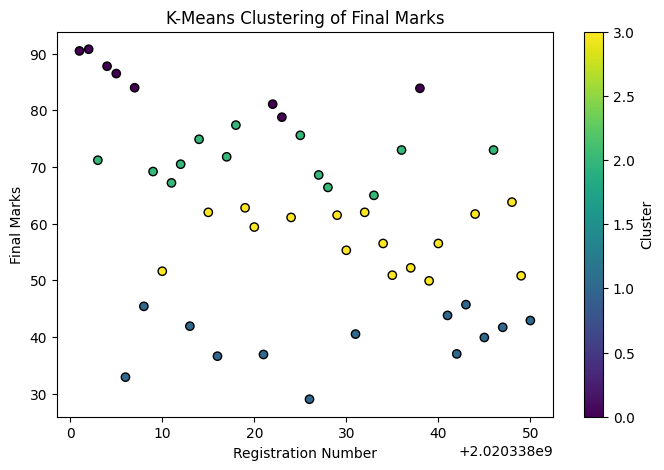

   Registration Number               Name  Best One  Average  \
0           2020338001       Andrew Myers        19     14.0   
1           2020338002  Anna Robinson DDS        20     15.0   
2           2020338003        Scott Jones        14     12.5   
3           2020338004         Scott Owen        19     17.0   
4           2020338005    Michael Hawkins        13     10.5   

   Attendance Marks  Term-Final Marks  Final Marks  Cluster  
0                10                95         90.5        0  
1                10                94         90.8        0  
2                 9                71         71.2        2  
3                 5                94         87.8        0  
4                 6               100         86.5        0  


In [42]:
# Apply K-Means clustering
from sklearn.cluster import KMeans


X = final_df[['Final Marks']].values
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
final_df['Cluster'] = kmeans.fit_predict(X)

# Visualizing Clusters
plt.figure(figsize=(8, 5))
plt.scatter(final_df['Registration Number'], final_df['Final Marks'], c=final_df['Cluster'], cmap='viridis', edgecolors='k')
plt.xlabel('Registration Number')
plt.ylabel('Final Marks')
plt.title('K-Means Clustering of Final Marks')
plt.colorbar(label='Cluster')
# plt.xticks(rotation=90)
plt.show()

print(final_df.head())